In [30]:
import pymapd
import mapd_renderer
connection_data = dict(
    user='mapd',
    password='HyperInteractive',
    host='metis.mapd.com',
    port='443',
    dbname='mapd',
    protocol='https'
)
con = pymapd.connect(**connection_data)

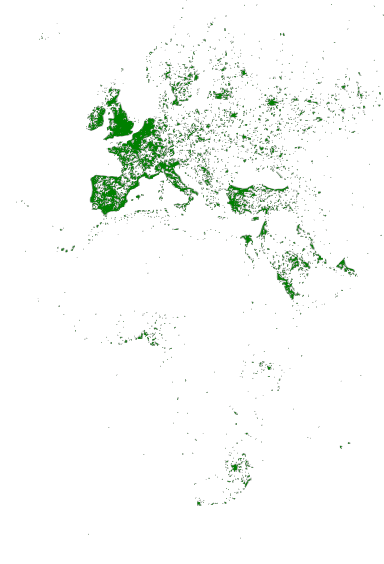

In [31]:
%%mapd $connection_data

width: 384
height: 564
data:
  - name: 'tweets'
    sql: 'SELECT goog_x as x, goog_y as y, tweets_nov_feb.rowid FROM tweets_nov_feb' 

scales:
  - name: 'x'
    type: 'linear'
    domain:
      - -3650484.1235206556
      -  7413325.514451755
    range: 'width'
  - name: 'y'
    type: 'linear'
    domain:
      - -5778161.9183506705
      -  10471808.487466192
    range: 'height'
marks:
  - type: 'points'
    from:
      data: 'tweets'
    properties:
      x:
        scale: 'x'
        field: 'x'
      y:
        scale: 'y'
        field: 'y'
      fillColor: 'green'
      size:
        value: 1      

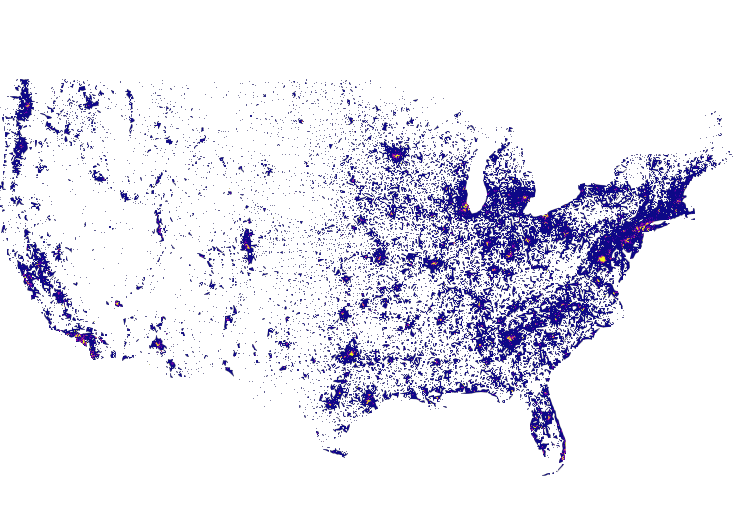

In [36]:
connection_data = dict(
    user='mapd',
    password='HyperInteractive',
    host='vega-demo.mapd.com',
    port='9092',
    dbname='mapd',
    protocol='http'
)

vega = """ {
  "width": 733,
  "height": 530,
  "data": [
    {
      "name": "heatmap_query",
      "sql": "SELECT rect_pixel_bin(conv_4326_900913_x(lon), -13847031.457875465, -7451726.712679257, 733, 733) as x,
                     rect_pixel_bin(conv_4326_900913_y(lat), 2346114.147993467, 6970277.197053557, 530, 530) as y,
                     SUM(amount) as cnt
                     FROM fec_contributions_oct
                     WHERE (lon >= -124.39000000000038 AND lon <= -66.93999999999943) AND
                           (lat >= 20.61570573311549 AND lat <= 52.93117449504004) AND
                           amount > 0 AND
                           recipient_party = 'R'
                           GROUP BY x, y"
    }
  ],
  "scales": [
    {
      "name": "heat_color",
      "type": "quantize",
      "domain": [
        10000.0,
        1000000.0
      ],
      "range": [ "#0d0887", "#2a0593", "#41049d", "#5601a4", "#6a00a8",
                 "#7e03a8", "#8f0da4", "#a11b9b", "#b12a90", "#bf3984",
                 "#cb4679", "#d6556d", "#e16462", "#ea7457", "#f2844b",
                 "#f89540", "#fca636", "#feba2c", "#fcce25", "#f7e425", "#f0f921"
      ],
      "default": "#0d0887",
      "nullValue": "#0d0887"
    }
  ],
  "marks": [
    {
      "type": "symbol",
      "from": {
        "data": "heatmap_query"
      },
      "properties": {
        "shape": "square",
        "x": {
          "field": "x"
        },
        "y": {
          "field": "y"
        },
        "width": 1,
        "height": 1,
        "fillColor": {
          "scale": "heat_color",
          "field": "cnt"
        }
      }
    }
  ]
}""".replace('\n', '')
im = mapd_renderer.MapDBackendRenderer(connection_data, json.loads(vega))
display(im)

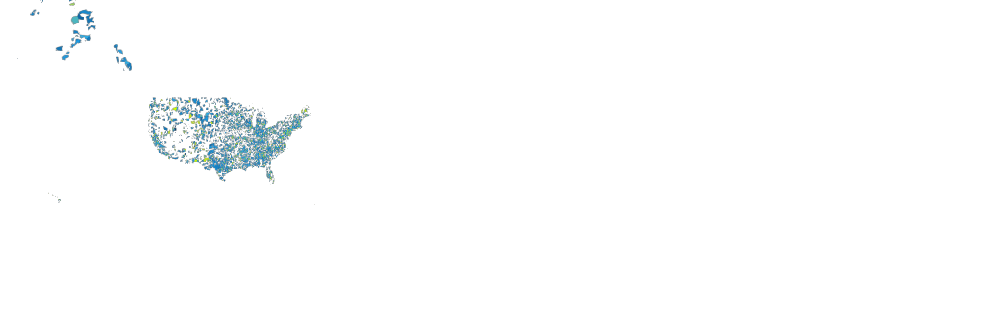

In [34]:
vega = """{
  "width": 1004,
  "height": 336,
  "data": [
    {
      "name": "polys",
      "format": "polys",
      "sql": "SELECT zipcodes.rowid,AVG(contributions_donotmodify.amount) AS avgContrib FROM contributions_donotmodify,zipcodes WHERE contributions_donotmodify.amount IS NOT NULL AND contributions_donotmodify.contributor_zipcode = zipcodes.ZCTA5CE10 GROUP BY zipcodes.rowid ORDER BY avgContrib DESC"
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "linear",
      "domain": [
        -19646150.75527339,
        19646150.755273417
      ],
      "range": "width"
    },
    {
      "name": "y",
      "type": "linear",
      "domain": [
        -3071257.58106188,
        10078357.267122284
      ],
      "range": "height"
    },
    {
      "name": "polys_fillColor",
      "type": "linear",
      "domain": [
        0, 325, 650, 975,
        1300, 1625, 1950, 2275, 2600
      ],
      "range": [
        "#115f9a", "#1984c5", "#22a7f0", "#48b5c4",
        "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"
      ],
      "default": "green",
      "nullValue": "#CACACA"
    }
  ],
  "marks": [
    {
      "type": "polys",
      "from": {
        "data": "polys"
      },
      "properties": {
        "x": {
          "scale": "x",
          "field": "x"
        },
        "y": {
          "scale": "y",
          "field": "y"
        },
        "fillColor": {
          "scale": "polys_fillColor",
          "field": "avgContrib"
        },
        "strokeColor": "white",
        "strokeWidth": 0,
        "lineJoin": "miter",
        "miterLimit": 10
      }
    }
  ]
}""".replace('\n', '')
im = mapd_renderer.MapDBackendRenderer(connection_data, json.loads(vega))
display(im)